# Oscilador Harmônico 

## Atividade desenvolvida no curso de Introdução a programação em física - Departamento de Física- UFMG
### Taynara Vitória de Souza 
 
O presente trabalho tem como objetivo analisar o comportamento de um sistema massa-mola(um oscilador harmônico) baseado no seu comportamento numerico e levando em conta que o sistema não perde energia. Para tal foram estabelecidos 2 casos em relação ao seu estado inicial:

* caso 1: $x_0 = 1$, $v_0 = 0$, $\Omega_0 = 1$
* caso 2: $x_0 = 0$, $v_0 = 1$, $\Omega_0 = 1$

E baseado (rs) na expanção de taylor da equação diferencial que desceve como o sistema se comporta ($\frac{d^2x}{dt^2} + \omega_0 x = 0$) calculou-se um vetor para os proximos valores da posição e da velocidade.

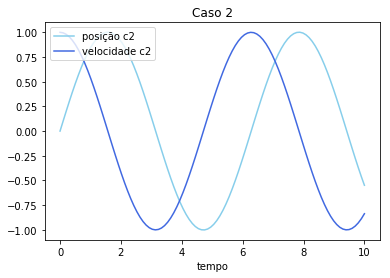

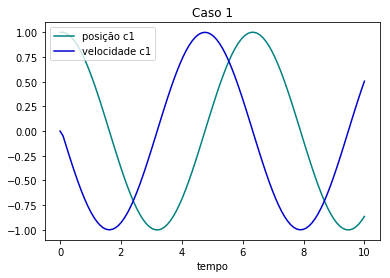

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math

         #CASO 2 
n=100
wo=1
vo=1
xo=0



t=np.linspace(0,10,n)
deltat=t[1]-t[0]


x1=xo+vo*deltat
posicao=[xo,x1]
#segundaderivada=(f(t+deltat)-2*f(t)+f(t-deltat))/delta**2

for i in range(1,n,1):
    posicao.append((posicao[i])*(2-(wo)*(deltat**2))-posicao[i-1])

velox=[vo]

for i in range(1,n,1):
    velox.append((posicao[i+1]-posicao[i-1])/(2*deltat))



plt.plot(t,posicao[0:n],'skyblue',label='posição c2')
plt.plot(t,velox,'royalblue',label='velocidade c2')
plt.xlabel('tempo')
plt.title('Caso 2')
plt.legend(loc=2)
plt.show()

#      CASO1

n=100
wo=1
vo=0
xo=1



t=np.linspace(0,10,n)
deltat=t[1]-t[0]


x1=xo+vo*deltat
posicao=[xo,x1]
#segundaderivada=(f(t+deltat)-2*f(t)+f(t-deltat))/delta**2

for i in range(1,n,1):
    posicao.append((posicao[i])*(2-(wo)*(deltat**2))-posicao[i-1])

velox=[vo]

for i in range(1,n,1):
    velox.append((posicao[i+1]-posicao[i-1])/(2*deltat))



plt.plot(t,posicao[0:n],'teal',label='posição c1')
plt.plot(t,velox,'mediumblue',label='velocidade c1')
plt.xlabel('tempo')
plt.title('Caso 1')
plt.legend(loc=2)
plt.show()

Observa-se nesses gráficos que  oscilador harmonico se comporta de forma harmônica,apesar de não ser tão vísivel na equação diferencial, isto fica muito claro com seu resultado analitico(função cosseno) e númerico.



Levando em conta que resultados númericos apresentam um erro e a máquina possui um outro erro,contruiu-se um gráfico que expressa este erro em forma de logarítim perante o tamanho dos intervalos entre os dados($\Delta t$).

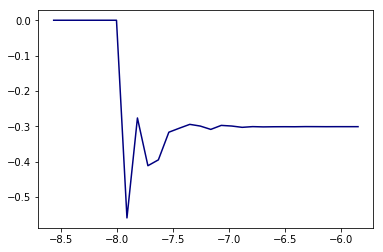

In [2]:
deltast=[]
erros=[]

xo=1.
vo=0.
wo=1.
to=0.
tf=0.00009
X=[]
W = [int(2**i) for i in np.linspace(6,15,30)]
for N in W:
    tempt=np.linspace(to,tf,N)
    tempdeltat=(tempt[1]-tempt[0])
    deltast.append(tempdeltat)
    X.append(xo)
    X.append(xo+vo*tempdeltat)
    
    for i in range(1,N,1):
        X.append((X[1])*(2-(wo)*(tempdeltat**2))-X[0])
    
    derivada=(X[2]-X[0])/(tempdeltat*2)
    erro1=np.abs((derivada+np.sin(tempt[1]))/np.sin(tempt[1]))
    erro2=np.abs(np.sin(tempt[1])*tempdeltat)
    erros.append(erro1+erro2)
    #print(erro1, '+', erro2, '=', erro1+erro2)
    X.clear()
    
    
plt.plot(np.log10(deltast),np.log10(erros),"navy")

Observa-se no gráfico que existe um valor ideal de $\Delta t$ para minimizar o erro.Notamos que este valor enta entre $10^{-8}$ e $10^{⁻7}$.



Nesse exercicio observou-se a questão energetica do caso 1. Para tal plotou-se o gráfico da energia cinética, da energia potencial elástica e soma das duas energias, a energia total do sistema. Para o cálculo das duas primeiras energias utilizou-se uma integral numérica simples, e para calculo da Energia total a simples soma das duas. 


a energia cinetica total soma 1.57812388838 Joules
a energia potencial total soma 1.56585590763 Joules


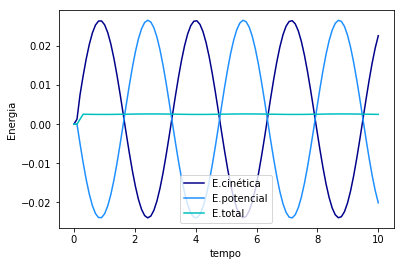

In [3]:
m=1
k=1
Ecin=0
Ecinimed=[0]
Epot=0
Epotimed=[(posicao[1]-posicao[0])/2]
Etotal=0
Etotalimed=[0]


for i in range(1,n,1):
    aux=m*(velox[i])*(velox[i]-velox[i-1])*m/2
    Ecinimed.append(aux)
    Ecin+=np.abs(aux)
    aux=m*(posicao[i])*(posicao[i]-posicao[i-1])*k/2
    Epotimed.append(aux)
    Epot+=np.abs(aux)
    Etotalimed.append(Ecinimed[i-1]+Epotimed[i-1])

    
#Ecinimed.append(Ecinimed[n-2])
#Epotimed.append(Epotimed[n-2])
#Etotalimed.append(Ecinimed[n-1]+Epotimed[n-1])

Etotal=Ecin+Epot



plt.plot(t,Ecinimed,'darkblue', label='E.cinética')
plt.plot(t,Epotimed,'dodgerblue', label='E.potencial')
plt.plot(t,Etotalimed,'c', label='E.total')
plt.xlabel('tempo')
plt.ylabel('Energia')
plt.legend(loc=8)

print('a energia cinetica total soma', Ecin, 'Joules')
print('a energia potencial total soma', Epot, 'Joules')

Observa-se no gráfico que a Energia potencial elastica se transforma integralmente em energia cinética, bem como o contrario, e a energia total do sistema permanece nula.  O sistema permanece com energia total 0 pois não foi inserida nenhuma fonte de energia no sistema, e assume energias negativas apenas como uma forma de expressar que há energia sendo gasta.Há tambem um leve crescimento inicial do sistema, isso se da pelo fato dos primeiros enementos do vetor posição não se comportarem de forma homogenea com o resto dos elementos, haja vista que o segundo elemento da posiçã é um produto simples da velocidade pelo $\Delta t$ somado a posição inicial.